# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('agaricus-lepiota.data')
x = data.drop(['edibility'], axis=1)
x = pd.get_dummies(data)

scaler = StandardScaler()
x = scaler.fit_transform(x)

data.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


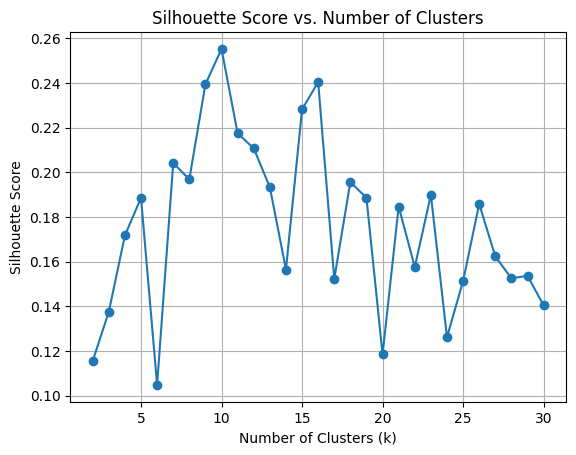

Optimal number of clusters (k): 10


In [5]:
silhouette_scores = []
k_values = range(2, 31)
for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    silhouette = silhouette_score(x, y_kmeans)
    silhouette_scores.append(silhouette)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()

optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k): {optimal_k}')

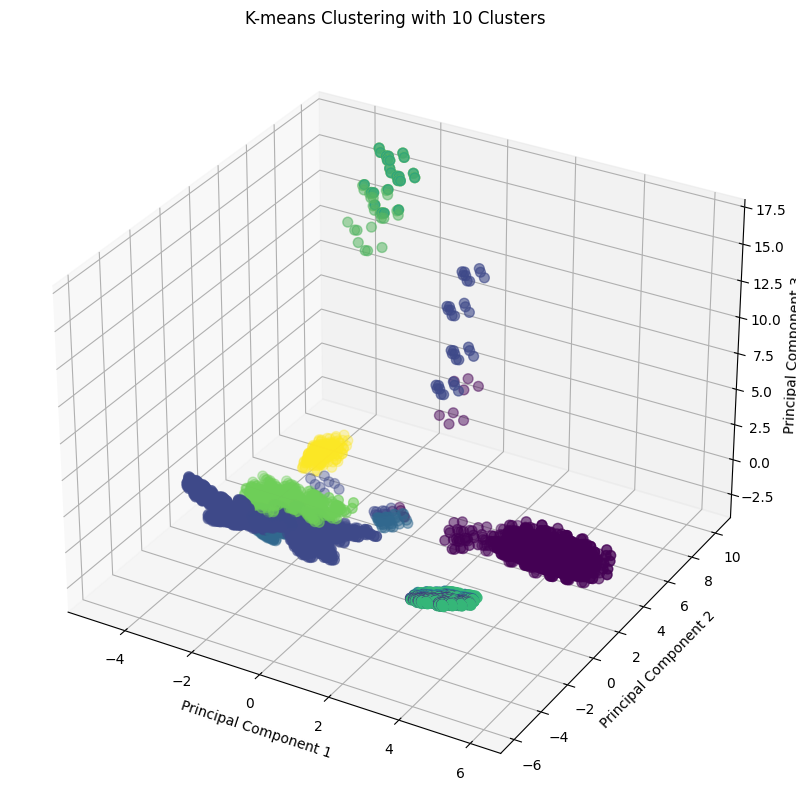

In [6]:
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

pca = PCA(n_components=3)
x = pca.fit_transform(x)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_kmeans, s=50, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'K-means Clustering with {optimal_k} Clusters')

plt.show()

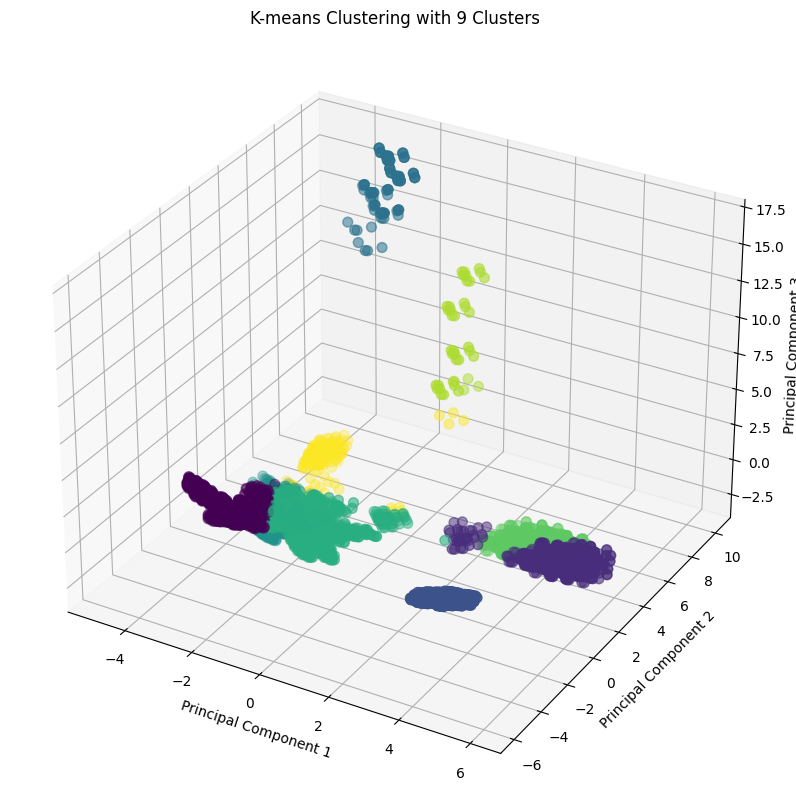

In [7]:
kmeans = MiniBatchKMeans(n_clusters=optimal_k-1, random_state=42, n_init=10)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_kmeans, s=50, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'K-means Clustering with {optimal_k-1} Clusters')

plt.show()

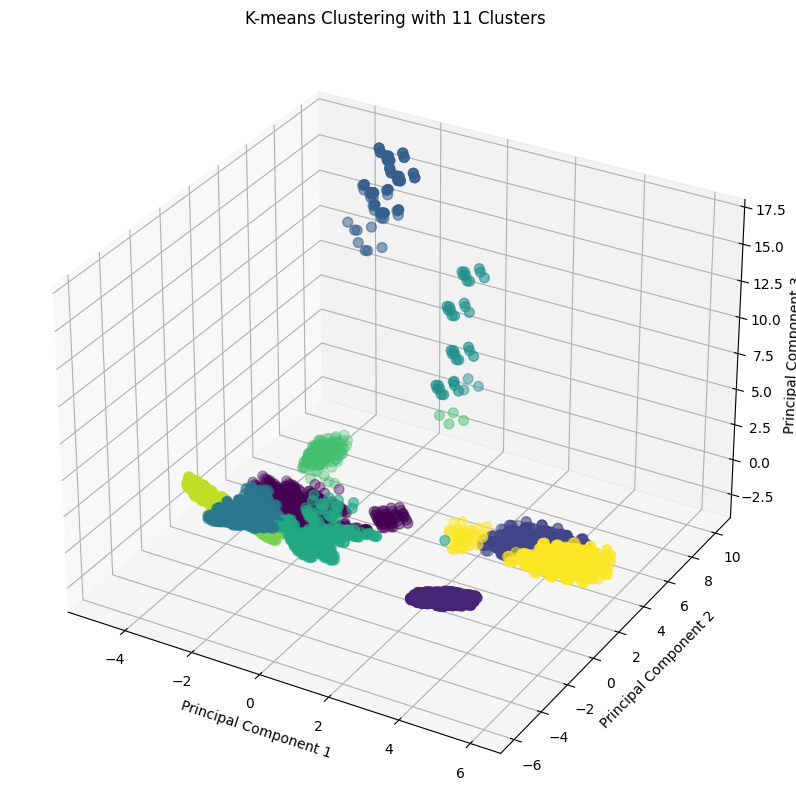

In [8]:
kmeans = MiniBatchKMeans(n_clusters=optimal_k+1, random_state=42, n_init=10)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_kmeans, s=50, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'K-means Clustering with {optimal_k+1} Clusters')

plt.show()